In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Preprocessed_data.csv', index_col = 0)
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,0,1,23,0,0,0,1,0,0,...,0,1,0,0,0,0,11,5,7,0
1,1,0,1,19,0,0,0,0,1,1,...,0,3,0,0,0,0,6,6,8,0
2,0,0,1,26,1,0,0,1,1,1,...,0,2,0,0,0,0,1,4,4,0
3,0,1,1,22,0,0,0,1,1,1,...,0,1,0,0,0,1,12,4,2,0
4,0,0,1,22,0,0,0,0,1,1,...,0,1,0,0,0,0,4,6,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,0,1,1,37,0,0,0,0,0,1,...,0,4,0,0,0,0,6,4,1,1
253668,0,1,1,29,1,0,1,0,1,1,...,0,2,0,0,1,1,10,3,6,1
253670,1,1,1,25,0,0,1,0,1,0,...,0,5,15,0,1,0,13,6,4,1
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1


In [3]:
X = df.iloc[:,0:-1]
y = df.loc[:, 'Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 1)

In [4]:
accuracy_list = []
accuracy_metric_list = []
accuracy_k_list = []
precision_list = []
precision_metric_list = []
precision_k_list = []
f1_list = []
f1_metric_list = []
f1_k_list = []

In [5]:
#k_range = [i for i in range(0,105)]
#k_value = k_range[0::5]
k_value = [i for i in range(1, 30)]

## Trial 1

In [6]:
start = datetime.now()

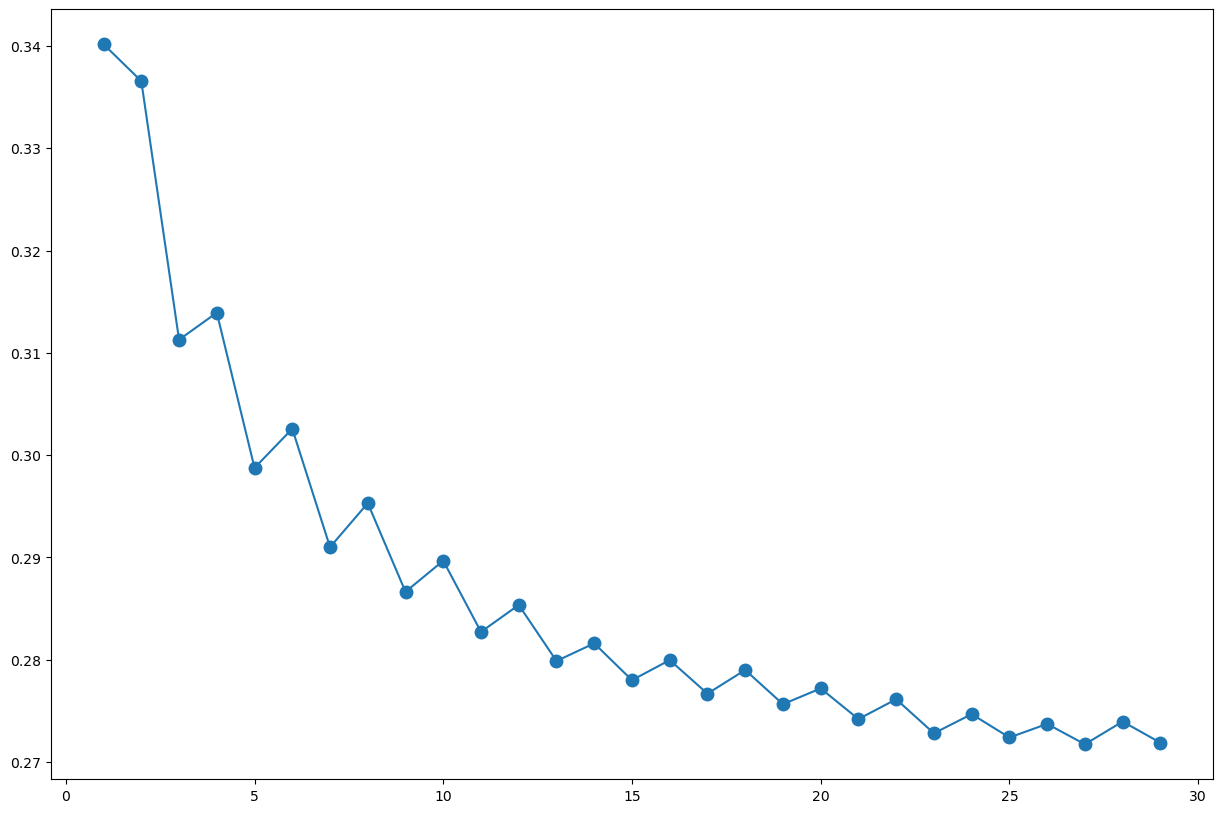

In [7]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [8]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [9]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.7502


In [10]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [11]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6748242645144494


In [12]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=26),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [13]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 26): 0.7099368179207353


## Trial 2

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 2)

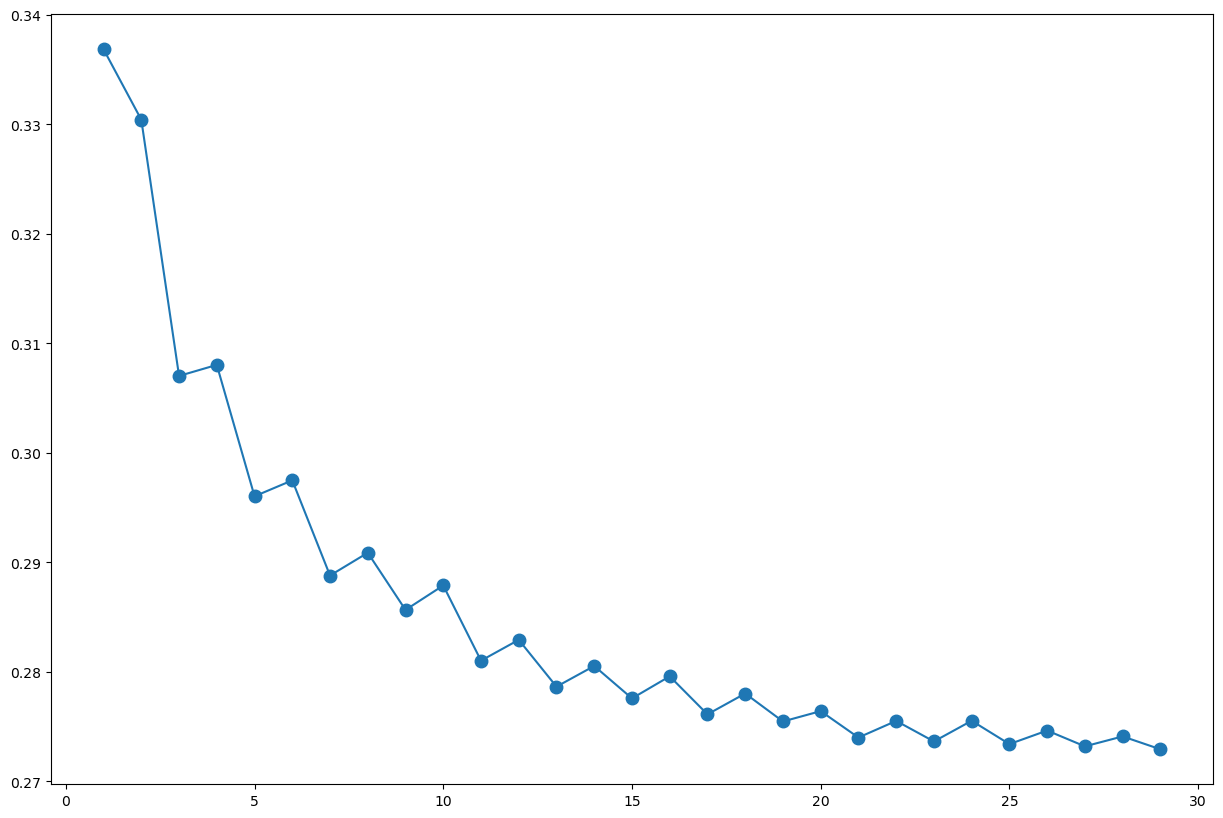

In [15]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [16]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [17]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7505


In [18]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [19]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.678851847084567


In [20]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=28),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [21]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 28): 0.7150127226463104


## Trial 3

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 3)

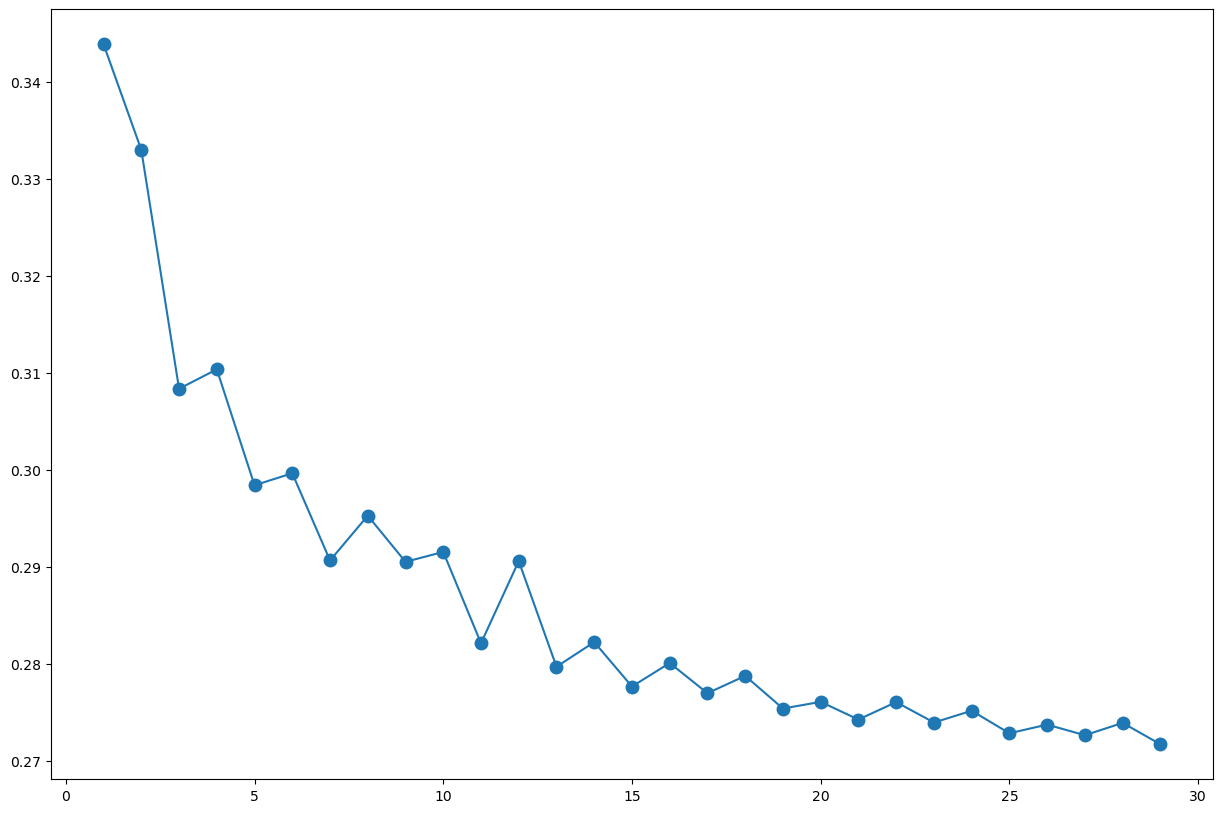

In [23]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [24]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [25]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7498


In [26]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [27]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6734534064212999


In [28]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=26),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [29]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 26): 0.7186134576172444


## Trial 4

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 4)

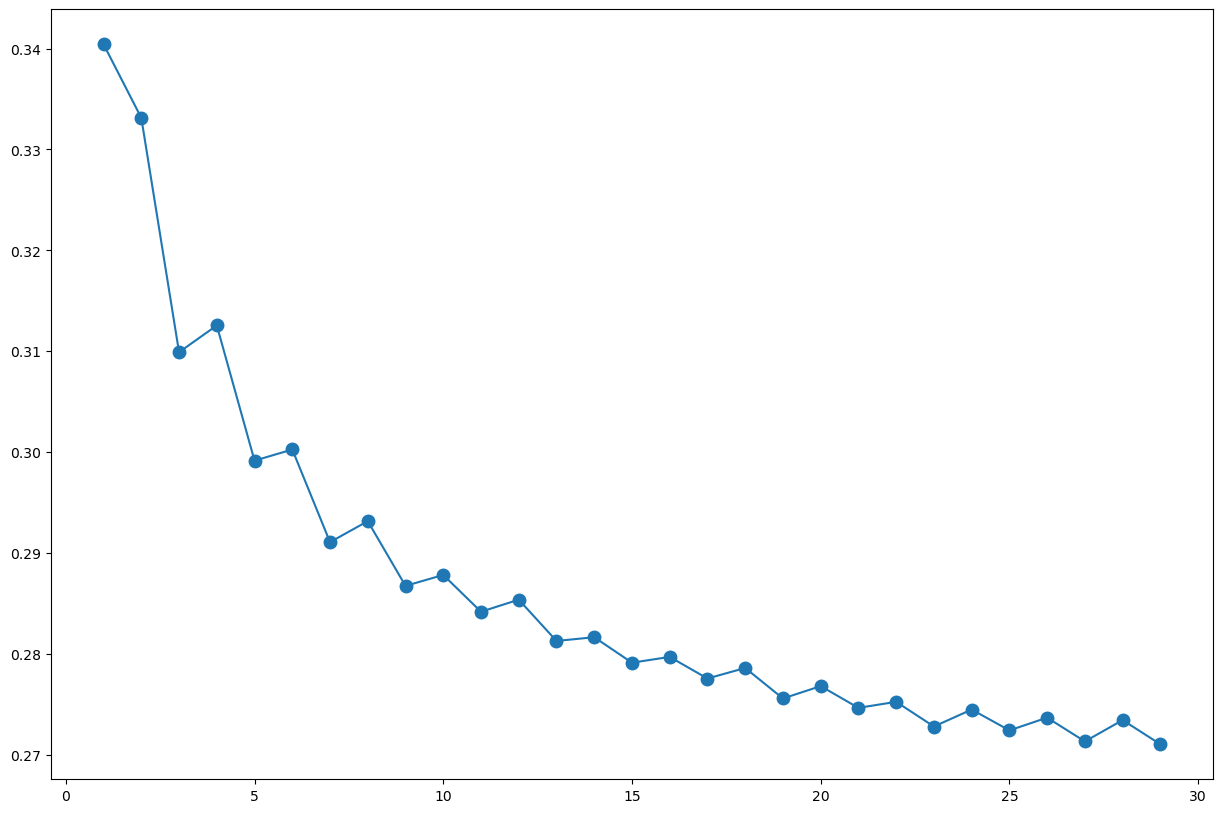

In [31]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [32]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [33]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7514


In [34]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [35]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.678146038322113


In [36]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=26),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [37]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 26): 0.7156223419336547


## Trial 5

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 5)

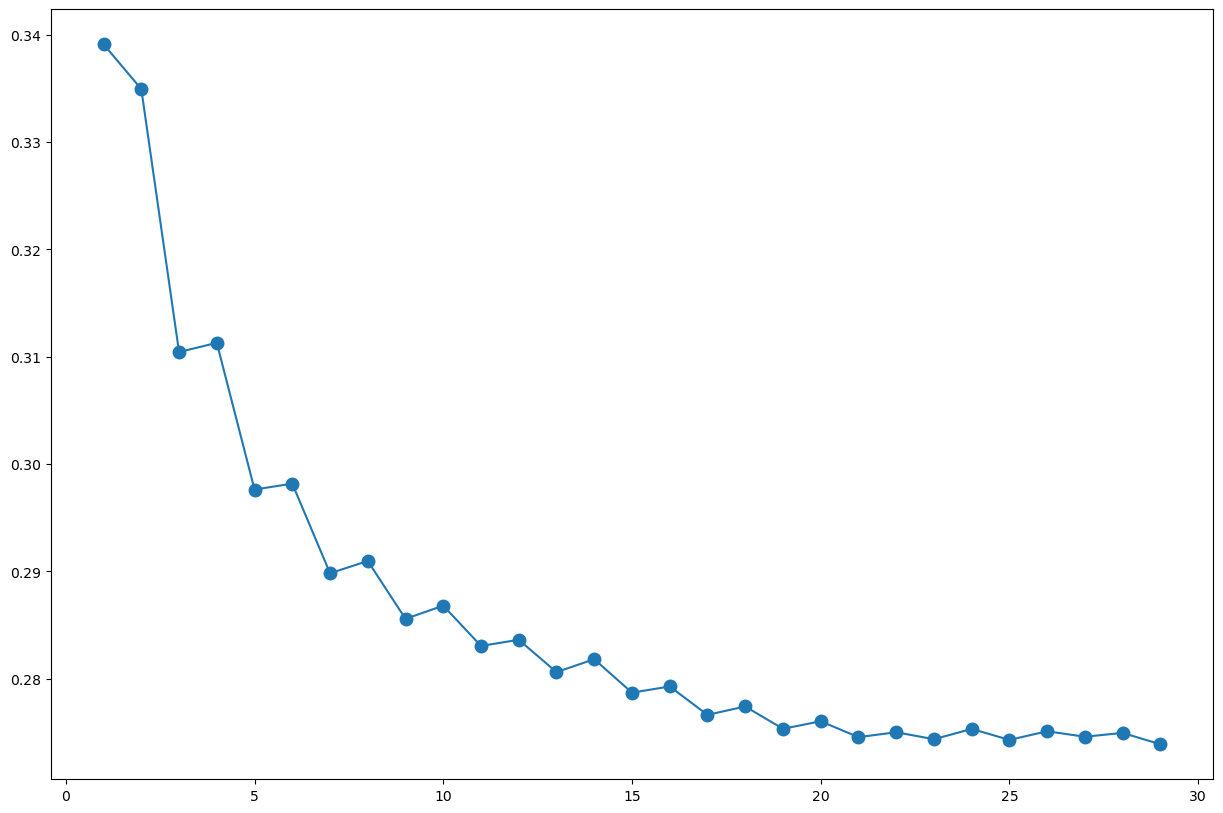

In [39]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [40]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [41]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7537


In [42]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [43]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6916238888193313


In [44]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=22),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [45]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 22): 0.7098614506927465


## Trial 6

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 6)

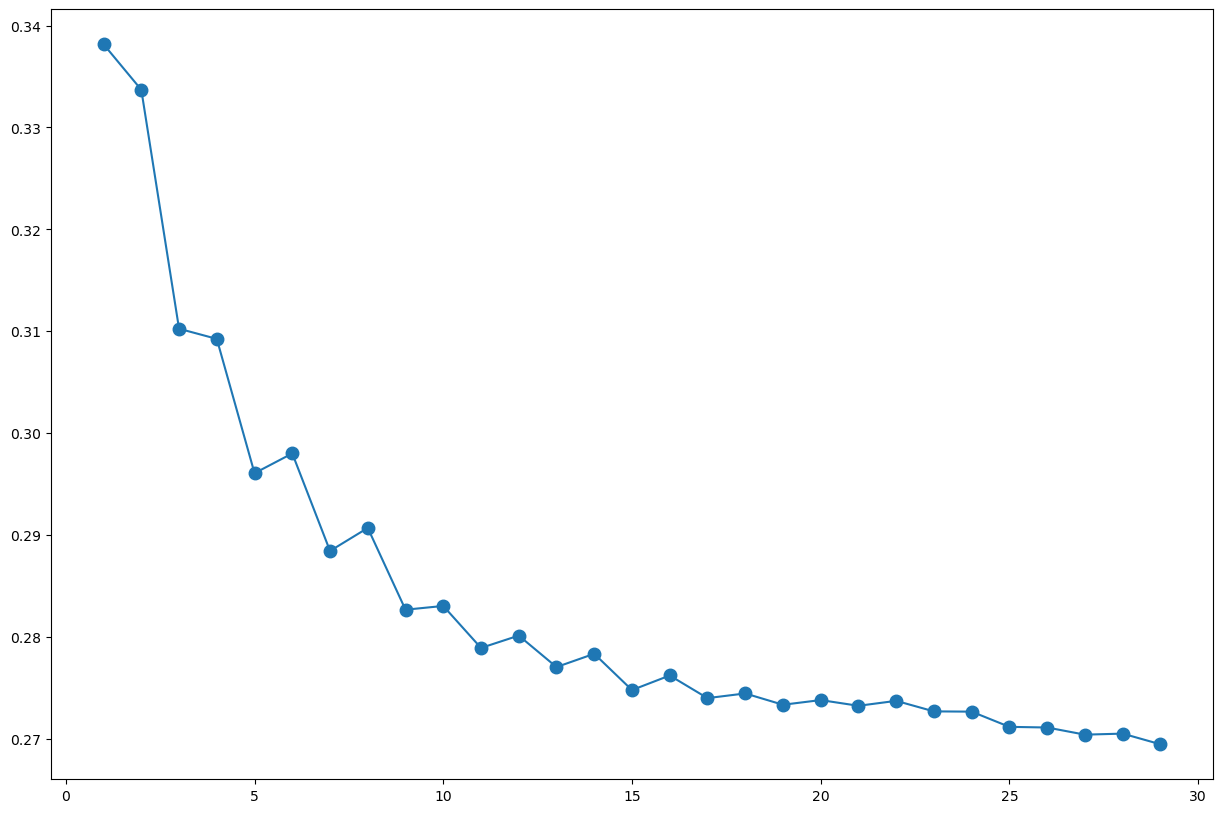

In [47]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [48]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [49]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7548


In [50]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [51]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6914947156517364


In [52]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=26),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [53]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 26): 0.7115902964959568


## Trial 7

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 7)

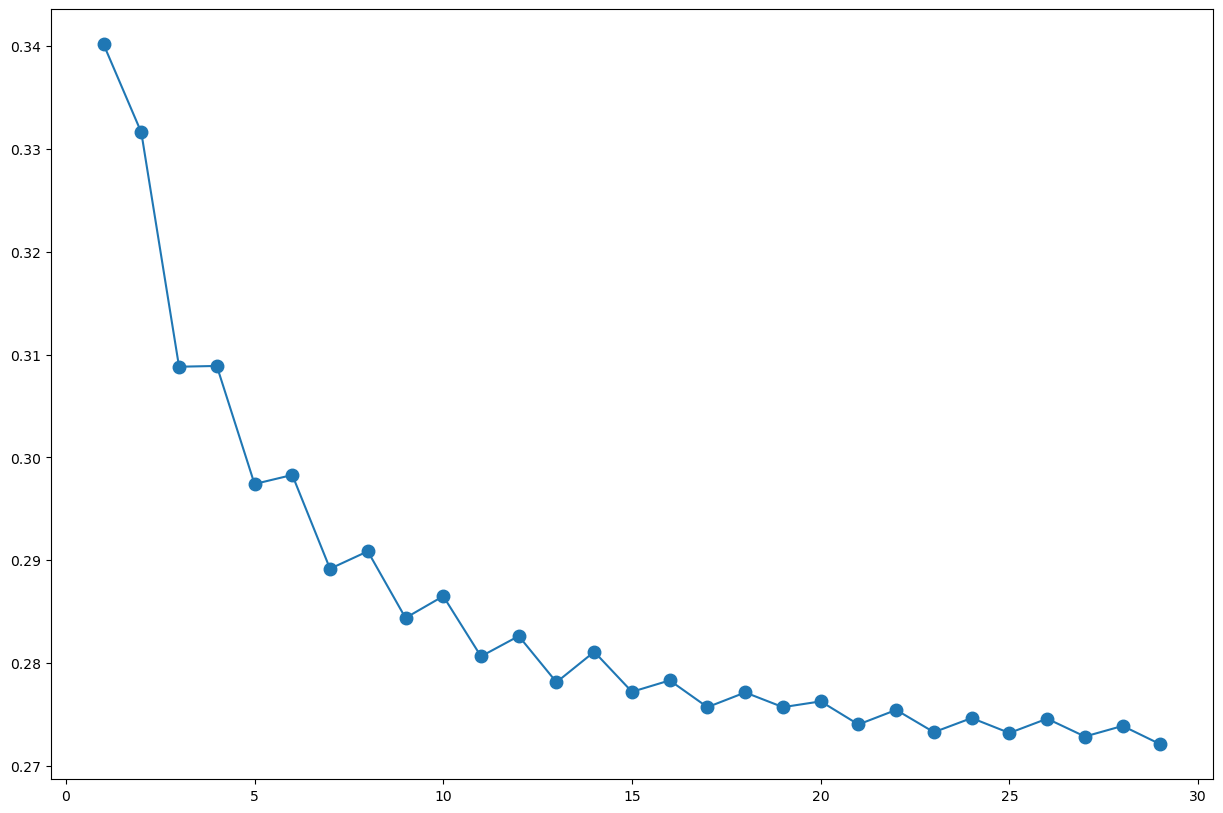

In [55]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [56]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [57]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7441


In [58]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [59]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6775859896686405


In [60]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=16),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [61]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 16): 0.7238446271618939


## Trial 8

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 8)

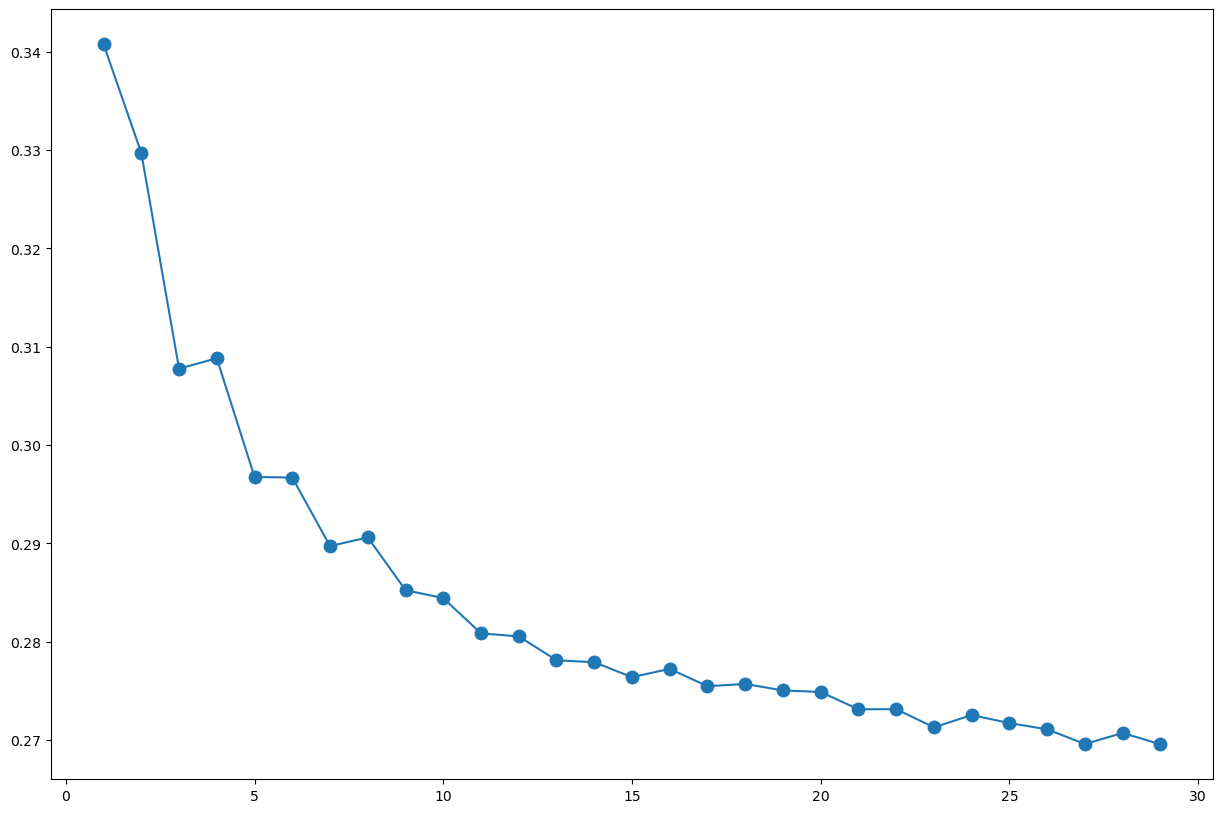

In [63]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [64]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [65]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7595


In [66]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [67]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6976919217260412


In [68]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=26),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [69]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 26): 0.7269262183501225


## Trial 9

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 9)

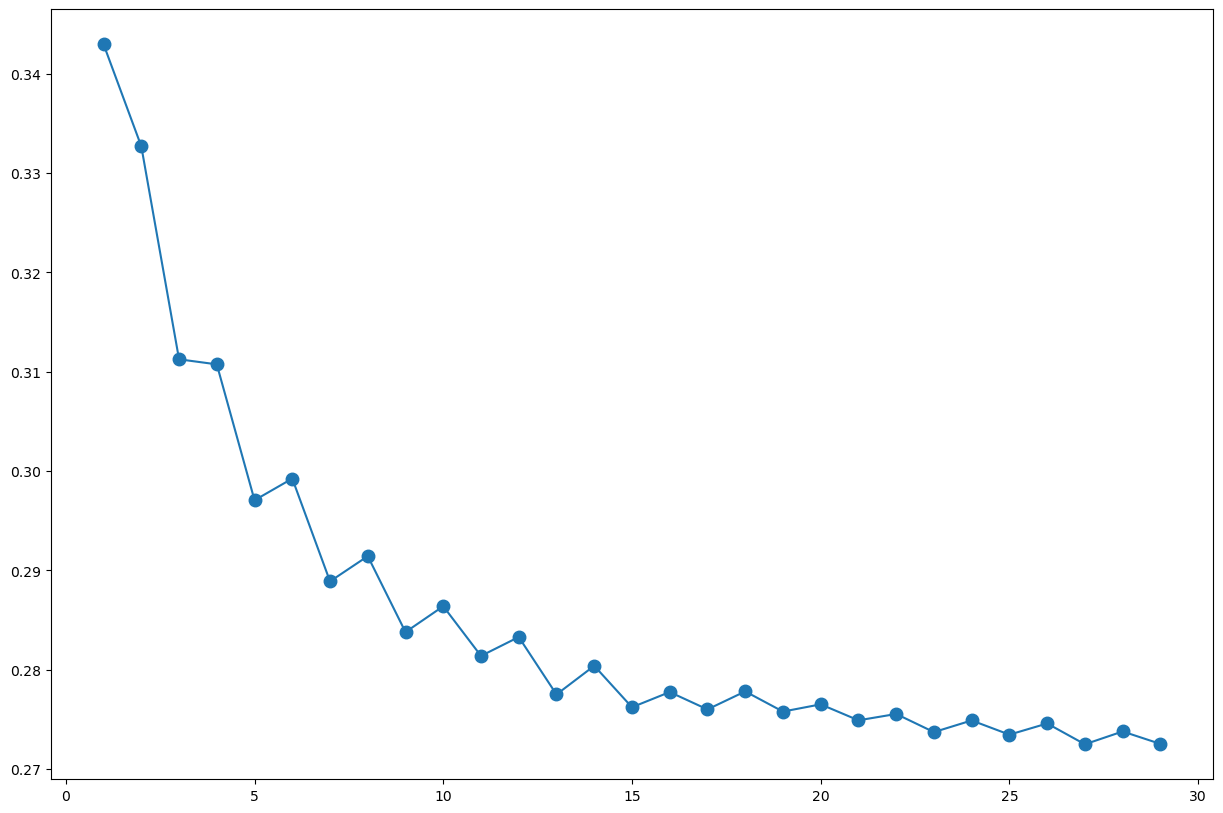

In [71]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [72]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [73]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.7512


In [74]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [75]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 27): 0.6789677419354839


In [76]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=16),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [77]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 16): 0.7255705090696314


## Trial 10

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=10000, shuffle=True, random_state = 10)

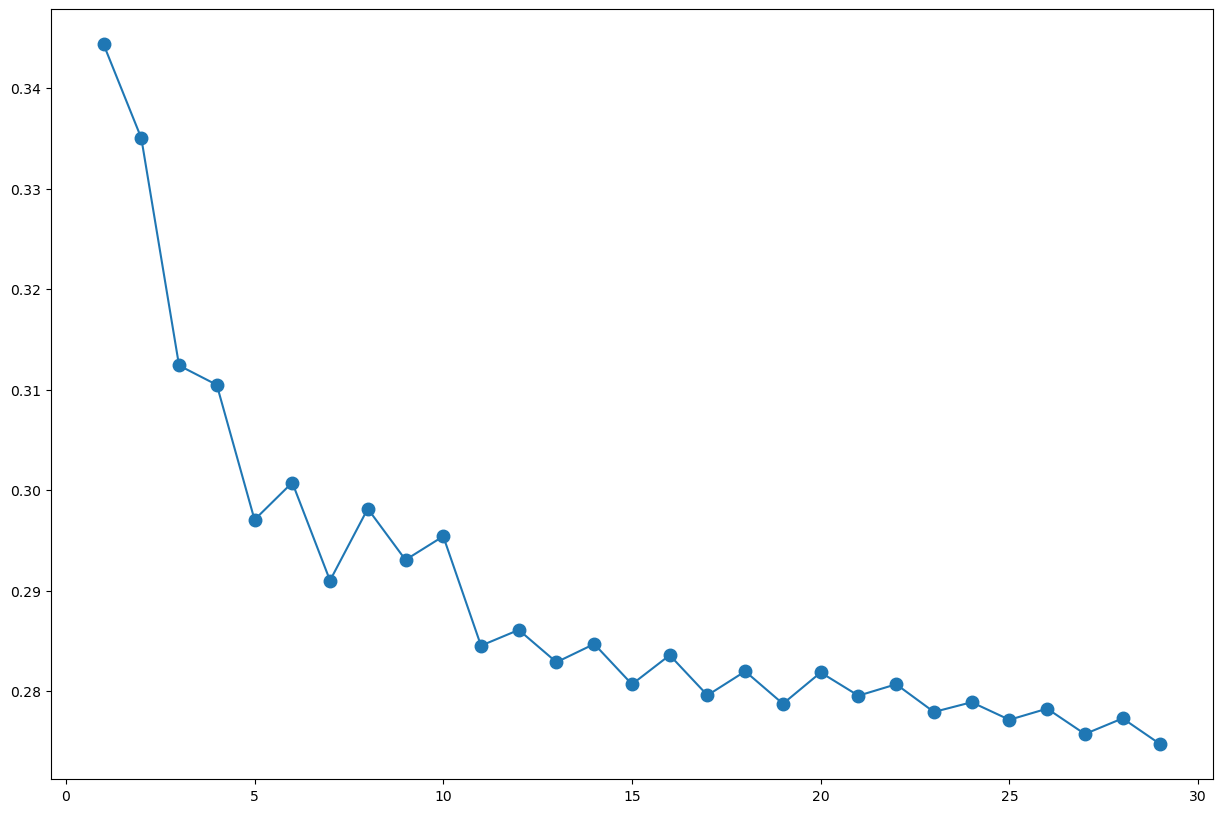

In [79]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    #acc.append(search_results.score(X_train, Y_train))
    Y_Predicted = search_results.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_Predicted))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [80]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [81]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_train, Y_train)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.7461


In [82]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [83]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
f1_Score = f1_score(Y_train,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 29): 0.6652603823335531


In [84]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=28),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [85]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_train)
Precision_Score = precision_score(Y_train,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 28): 0.7082724349605378


In [86]:
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

Time:  2:06:48.152858


## Results

In [87]:
data = {'Accuracy': accuracy_list, 'Accuracy K': accuracy_k_list, 'Accuracy Metric': accuracy_metric_list,
        'Precision': precision_list, 'Precision K': precision_k_list, 'Precision Metric': precision_metric_list,
        'F1_micro':f1_list, 'F1_micro K': f1_k_list, 'F1_micro Metric': f1_metric_list}

In [88]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Accuracy,Accuracy K,Accuracy Metric,Precision,Precision K,Precision Metric,F1_micro,F1_micro K,F1_micro Metric
0,0.7502,27,manhattan,0.709937,26,manhattan,0.674824,27,manhattan
1,0.7505,29,manhattan,0.715013,28,manhattan,0.678852,29,manhattan
2,0.7498,29,manhattan,0.718613,26,manhattan,0.673453,29,manhattan
3,0.7514,29,manhattan,0.715622,26,manhattan,0.678146,29,manhattan
4,0.7537,29,manhattan,0.709861,22,manhattan,0.691624,29,manhattan
5,0.7548,29,manhattan,0.711590,26,manhattan,0.691495,29,manhattan
6,0.7441,29,manhattan,0.723845,16,manhattan,0.677586,29,manhattan
7,0.7595,29,manhattan,0.726926,26,manhattan,0.697692,27,manhattan
8,0.7512,27,manhattan,0.725571,16,manhattan,0.678968,27,manhattan
9,0.7461,29,manhattan,0.708272,28,manhattan,0.665260,29,manhattan


In [89]:
trainingResults.to_csv('KNN_trainingResults.csv')